# Problema 3

Implementación del algoritmo markov_ising().

In [1]:
#Librerías necesarias
import random
import numpy as np
import matplotlib.pyplot as plt

Podemos partir definiendo las condiciones de la lattice y utilizando la expresión para vecinos periódicos del Problema 2:

In [95]:
#Parámetros Lattice
L = 6
N = L * L
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}

#Definimos el numéro de samples
samples = 10**6

Ahora seguimos el pseudo-código de la clase para definir la función markov_ising()

In [96]:
def markov_ising(S, N, E, beta, iter):
  E1, E2 = 0, 0

  for sample in range(samples):
    k = random.randint(0, N-1)
    h = 0
    for j in vecinos[k]:
      h += S[j]

    delta_E = 2*S[k]*h

    gamma = np.exp(-beta*delta_E)

    if random.uniform(0, 1) < gamma:
      S[k] *= -1
      E += delta_E

    E1 += E
    E2 += E**2

  return E1/samples, E2/samples

Ahora que hemos definido la función mrakov_ising() con el respectivo criterio de metropolis, podemos hacer la simulación para $T=2$ y hallar la energía promedio $<E/N>$y el calor específico $c_v$

In [97]:
def simulate_ising(L, N,T, iter):
    beta = 1 / T
    # Inicialización aleatoria de espines
    S = []
    M_tot = 0
    for k in range(N):
      S.append(random.choice([1, -1]))
    # Energía inicial del sistema
    E = 0
    for k in range(N):
        suma_vecinos = 0
        for j in vecinos[k]:
            suma_vecinos += S[j]
        E += S[k] * suma_vecinos
    E *= -0.5
    M_tot += calculate_magnetization(S)

    E_av, E2_av = markov_ising(S, N, E, beta, iter)

    return E_av, E2_av,  M_tot /samples

In [100]:
def calor_especifico(E_av, E2_av, beta, N):
    return beta ** 2 * (E2_av - E_av ** 2) / N #Definición de c_v

T_rango = np.linspace(0.5, 4.0, 8)  # Lista de temperaturas
energias = []
cv_s = []

# Simulación para cada temperatura
for T in T_rango:
    E_av, E2_av, M_tot = simulate_ising(L, N, T, iter)
    energias.append(E_av / N)  # Energía promedio por espín
    cv_s.append(calor_especifico(E_av, E2_av, 1.0 / T, N))
    print(f'Temperatura: {T}, Energía promedio: {E_av / N}, Calor específico: {calor_especifico(E_av, E2_av, 1/T, N)}')

Temperatura: 0.5, Energía promedio: -1.9998461111111112, Calor específico: 0.024204589822147682
Temperatura: 1.0, Energía promedio: -1.9966817777777779, Calor específico: 0.03455650733510791
Temperatura: 1.5, Energía promedio: -1.9506932222222224, Calor específico: 0.2037311950378263
Temperatura: 2.0, Energía promedio: -1.7473242222222223, Calor específico: 0.6895101174751106
Temperatura: 2.5, Energía promedio: -1.2856922222222222, Calor específico: 1.0004584026382226
Temperatura: 3.0, Energía promedio: -0.8917256666666667, Calor específico: 0.5618263292858761
Temperatura: 3.5, Energía promedio: -0.6855030000000001, Calor específico: 0.2952984524724171
Temperatura: 4.0, Energía promedio: -0.5685427777777777, Calor específico: 0.18810958046597223


Calculando el error se obtiene que en promedio existe un error en la energía del $0.12 \%$ mientras que para el calor específico $c_v$ se tiene en promedio un error del $0.15 \%$ por lo cual sabemos que el algoritmo funciona de forma eficiente.

Para la grafica se dividirá el intervalo de temperatura en más valores de forma que las curvas sean más suaves.

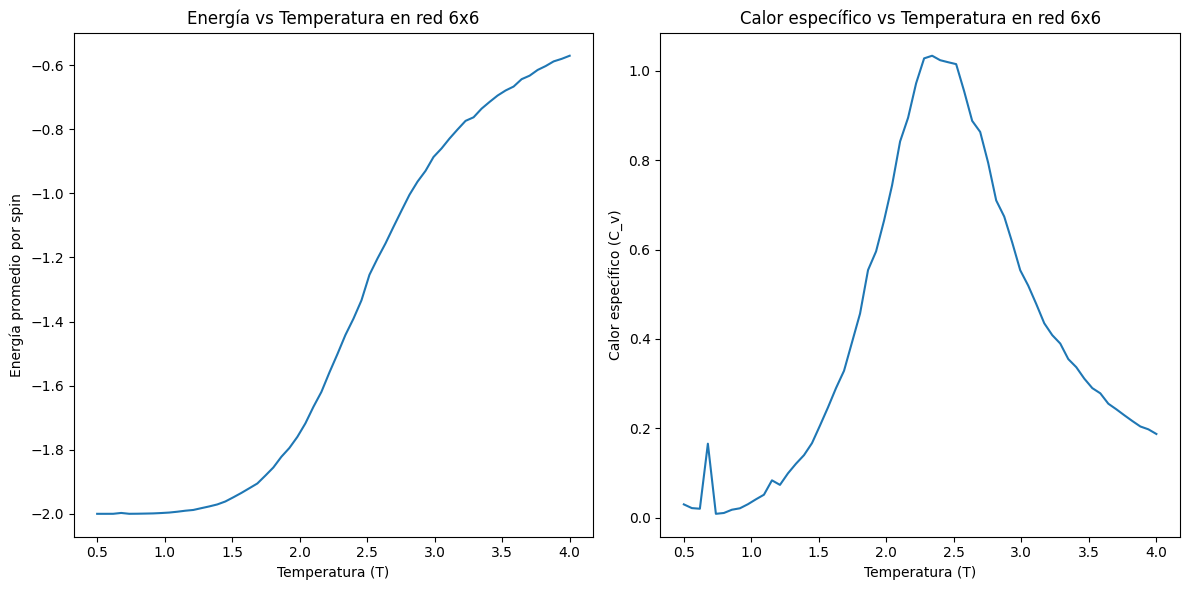

In [101]:
def calor_especifico(E_av, E2_av, beta, N):
    return beta ** 2 * (E2_av - E_av ** 2) / N #Definición de c_v

T_rango = np.linspace(0.5, 4.0, 60)  # Lista de temperaturas
energias = []
cv_s = []

# Simulación para cada temperatura
for T in T_rango:
    E_av, E2_av, _ = simulate_ising(L, N, T, iter)
    energias.append(E_av / N)  # Energía promedio por espín
    cv_s.append(calor_especifico(E_av, E2_av, 1.0 / T, N))

plt.figure(figsize=(12, 6))

# Energía promedio vs Temperatura
plt.subplot(1, 2, 1)
plt.plot(T_rango, energias)
plt.xlabel('Temperatura (T)')
plt.ylabel('Energía promedio por spin')
plt.title('Energía vs Temperatura en red 6x6')

# Calor específico vs Temperatura
plt.subplot(1, 2, 2)
plt.plot(T_rango, cv_s)
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico (C_v)')
plt.title('Calor específico vs Temperatura en red 6x6')

plt.tight_layout()
plt.show()

Ahora calculamos la magnetización

In [102]:
# Función para calcular la magnetización absoluta
def calculate_magnetization(S):
    return abs(sum(S))

In [ ]:
L_list = [4, 8, 16, 32]  #Tenemos diferentes tamaños de red
T_list = np.linspace(0.5, 4.0, 60)

magnetizacion = {L: [] for L in L_list}

# Simulación para cada tamaño de red y temperatura
for L in L_list:
    N = L * L
    # Definir vecinos para la red de tamaño L
    vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}

    for T in T_list:
        # Ejecutar simulación para cada temperatura
        E_av, E2_av, M_av = simulate_ising(L, N, T, iter)
        magnetizacion[L].append(M_av / N)  # Magnetización promedio por espín

# Graficar los resultados
plt.figure(figsize=(8, 6))

for L in L_list:
    plt.plot(T_list, magnetizacion[L], 'o-', label=f'L = {L}')

plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización absoluta promedio por spin')
plt.title('Magnetización vs Temperatura para diferentes tamaños de red')
plt.legend()
plt.show()
